In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
train_data = pd.read_csv('/train.csv')
test_data = pd.read_csv('/test.csv')

In [ ]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
train_data.shape

(891, 12)

In [ ]:
test_data.shape

(418, 11)

In [ ]:
train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
train_data.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


In [ ]:
train_data.drop('Cabin',axis=1,inplace=True)

In [ ]:
test_data.drop('Cabin',axis=1,inplace=True)

In [ ]:
median_age=train_data['Age'].median()
train_data['Age'].replace(np.nan,median_age,inplace=True)

/tmp/ipython-input-11-2108175202.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_data['Age'].replace(np.nan,median_age,inplace=True)


In [ ]:
median_age=test_data['Age'].median()
test_data['Age'].replace(np.nan,median_age,inplace=True)

/tmp/ipython-input-12-2672585666.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  test_data['Age'].replace(np.nan,median_age,inplace=True)


In [ ]:
freq_port = train_data.Embarked.dropna().mode()[0]
train_data['Embarked'] = train_data['Embarked'].fillna(freq_port)

In [ ]:
train_data.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0


In [ ]:
test_data.isnull().sum()

,0
PassengerId,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,1
Embarked,0


<Axes: xlabel='Survived', ylabel='count'>

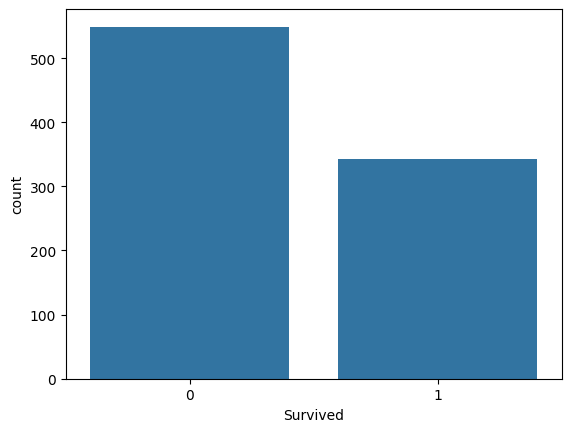

In [ ]:
# test_data.isnull().sum()
sns.countplot(x='Survived',data=train_data)

<Axes: xlabel='Survived', ylabel='count'>

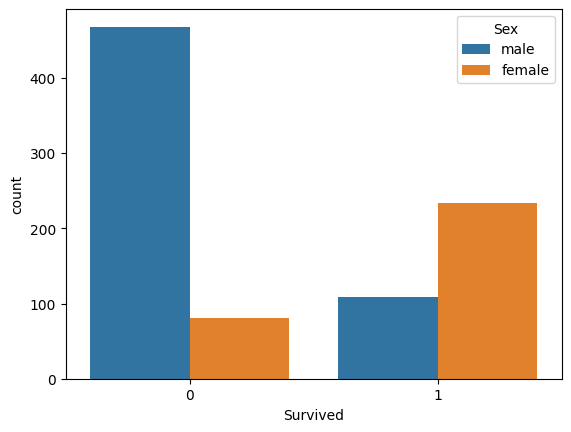

In [ ]:
sns.countplot(x='Survived',hue='Sex',data=train_data)

In [ ]:
women=train_data.loc[train_data.Sex=='female']['Survived']
rate_women=sum(women)/len(women) * 100
print(' % of women survivers : ', rate_women)

 % of women survivers :  74.20382165605095


In [ ]:
men=train_data.loc[train_data.Sex=='male']['Survived']
rate_men=sum(men)/len(men) * 100
print(' % of men survivers : ', rate_men)

 % of men survivers :  18.890814558058924


<Axes: xlabel='Survived', ylabel='count'>

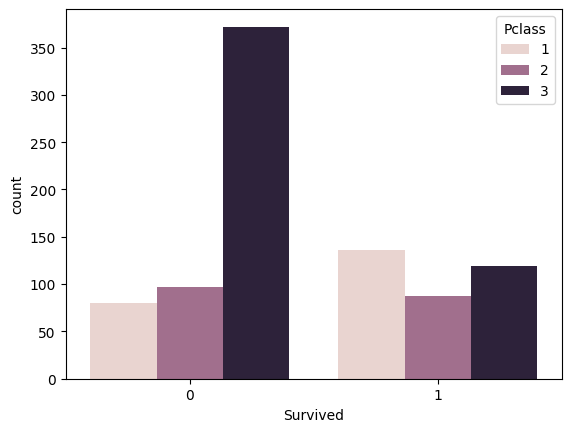

In [ ]:
sns.countplot(x='Survived',hue='Pclass',data=train_data)

In [ ]:
class1=train_data.loc[train_data.Pclass==1]['Survived']
rate_class1=sum(class1)/len(class1) * 100
print(' % of class1 survivers : ', rate_class1)

 % of class1 survivers :  62.96296296296296


In [ ]:
class2=train_data.loc[train_data.Pclass==2]['Survived']
rate_class2=sum(class2)/len(class2) * 100
print(' % of class2 survivers : ', rate_class2)

 % of class2 survivers :  47.28260869565217


In [ ]:
class3=train_data.loc[train_data.Pclass==3]['Survived']
rate_class3=sum(class3)/len(class3) * 100
print(' % of class3 survivers : ', rate_class3)

 % of class3 survivers :  24.236252545824847


<Axes: xlabel='Survived', ylabel='count'>

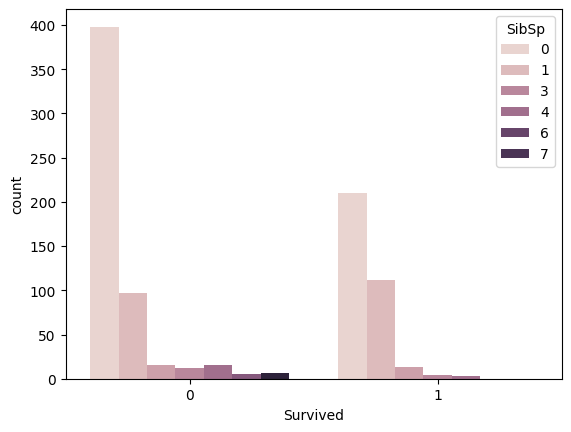

In [ ]:
sns.countplot(x='Survived',hue='SibSp',data=train_data)

<Axes: xlabel='Survived', ylabel='count'>

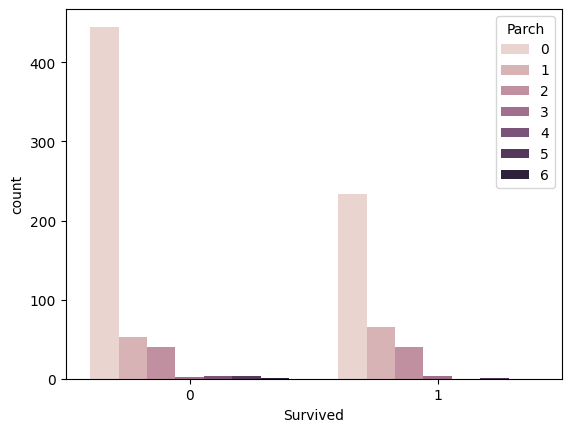

In [ ]:
sns.countplot(x='Survived',hue='Parch',data=train_data)

<Axes: xlabel='Survived', ylabel='Age'>

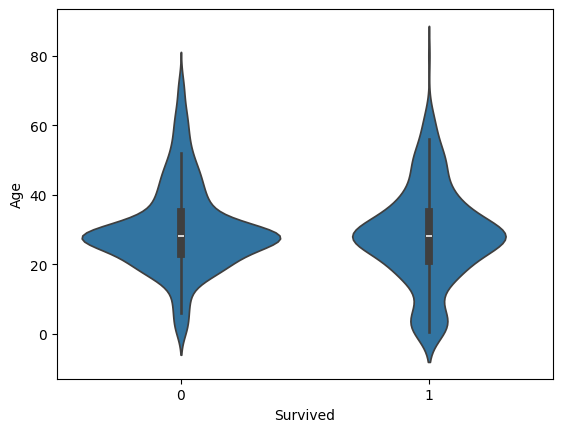

In [ ]:
sns.violinplot(x='Survived',y='Age',data=train_data)

<Axes: xlabel='Survived', ylabel='count'>

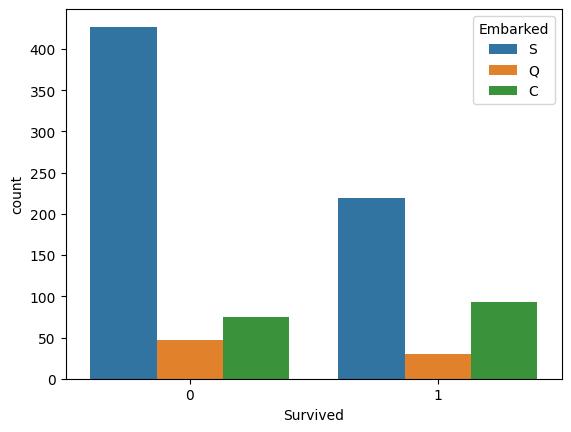

In [ ]:
sns.countplot(x='Survived',hue='Embarked',data=train_data)

Feature Engineering

In [ ]:
train_data['Sex']=train_data['Sex'].map({'female' : 1,'male' : 0}).astype(int)
test_data['Sex']=test_data['Sex'].map({'female' : 1,'male' : 0}).astype(int)

In [ ]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,S


In [ ]:
emb_dummy = pd.get_dummies(train_data['Embarked'])
train_data=pd.concat([train_data,emb_dummy],axis=1)

In [ ]:
emb_dummy2 = pd.get_dummies(test_data['Embarked'])
test_data=pd.concat([test_data,emb_dummy2],axis=1)

In [ ]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,C,Q,S
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,S,False,False,True
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C,True,False,False
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,S,False,False,True
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,S,False,False,True
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,S,False,False,True


In [ ]:
drop_cols=['Name','Ticket','Fare','Embarked']
train_data=train_data.drop(drop_cols,axis=1)
train_data=train_data.drop(['PassengerId'],axis=1)

In [ ]:
test_data=test_data.drop(drop_cols,axis=1)

In [ ]:
train_data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,C,Q,S
0,0,3,0,22.0,1,0,False,False,True
1,1,1,1,38.0,1,0,True,False,False
2,1,3,1,26.0,0,0,False,False,True
3,1,1,1,35.0,1,0,False,False,True
4,0,3,0,35.0,0,0,False,False,True


In [ ]:
test_data.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,C,Q,S
0,892,3,0,34.5,0,0,False,True,False
1,893,3,1,47.0,1,0,False,False,True
2,894,2,0,62.0,0,0,False,True,False
3,895,3,0,27.0,0,0,False,False,True
4,896,3,1,22.0,1,1,False,False,True


In [ ]:
train_data.loc[ train_data['Age'] <= 16, 'Age'] = 0
train_data.loc[(train_data['Age'] > 16) & (train_data['Age'] <= 36), 'Age'] = 1
train_data.loc[(train_data['Age'] > 36) & (train_data['Age'] <= 50), 'Age'] = 2
train_data.loc[(train_data['Age'] > 50) & (train_data['Age'] <= 64), 'Age'] = 3
train_data.loc[ train_data['Age'] > 64, 'Age'] = 4

In [ ]:
test_data.loc[ test_data['Age'] <= 16, 'Age'] = 0
test_data.loc[(test_data['Age'] > 16) & (test_data['Age'] <= 36), 'Age'] = 1
test_data.loc[(test_data['Age'] > 36) & (test_data['Age'] <= 50), 'Age'] = 2
test_data.loc[(test_data['Age'] > 50) & (test_data['Age'] <= 64), 'Age'] = 3
test_data.loc[ test_data['Age'] > 64, 'Age'] = 4


In [ ]:
train_data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,C,Q,S
0,0,3,0,1.0,1,0,False,False,True
1,1,1,1,2.0,1,0,True,False,False
2,1,3,1,1.0,0,0,False,False,True
3,1,1,1,1.0,1,0,False,False,True
4,0,3,0,1.0,0,0,False,False,True


In [ ]:
test_data.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,C,Q,S
0,892,3,0,1.0,0,0,False,True,False
1,893,3,1,2.0,1,0,False,False,True
2,894,2,0,3.0,0,0,False,True,False
3,895,3,0,1.0,0,0,False,False,True
4,896,3,1,1.0,1,1,False,False,True


In [ ]:
X_train=train_data.drop(['Survived'],axis=1).values
Y_train=train_data['Survived'].values

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X_train,Y_train,test_size=0.25)

In [ ]:
from sklearn.linear_model import LogisticRegression
regressor=LogisticRegression()
regressor.fit(x_train,y_train)

LogisticRegression()

In [ ]:
y_pred=regressor.predict(x_test)

In [ ]:
from sklearn.metrics import accuracy_score,confusion_matrix
acc=accuracy_score(y_test,y_pred)
acc

0.7488789237668162

In [ ]:
cm=confusion_matrix(y_test,y_pred)
cm

array([[107,  34],
       [ 22,  60]])

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
dt.fit(x_train,y_train)

DecisionTreeClassifier()

In [ ]:
y_pred1=dt.predict(x_test)

In [ ]:
from sklearn.metrics import accuracy_score,confusion_matrix
acc2=accuracy_score(y_test,y_pred1)
acc2

0.7847533632286996

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rc=RandomForestClassifier(max_depth=9, random_state=0)
rc.fit(x_train,y_train)

RandomForestClassifier(max_depth=9, random_state=0)

In [ ]:
y_pred2=rc.predict(x_test)

In [ ]:
acc3=accuracy_score(y_test,y_pred2)
acc3

0.7757847533632287

In [ ]:
regressor.fit(X_train,Y_train)

LogisticRegression()

In [ ]:
test=test_data.drop(['PassengerId'],axis=1)
final_pred=regressor.predict(test)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


In [ ]:
test_data['Survived'] = final_pred
test_data.drop(['Pclass','Age','Sex','SibSp','Parch','C','Q','S'],inplace=True,axis=1)

In [ ]:
test_data.to_csv('Submission.csv', index = False)